In [1]:
import os
import numpy as np
import seaborn as sns
from scipy import stats
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def plt_confusion_matrix(true_labels, pred_labels, labels):
    
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels, cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [3]:
folder_path = '../data/Images'

X = []
y = []

for filename in os.listdir(folder_path):

    file_path = os.path.join(folder_path, filename)

    if os.path.isfile(file_path) and filename.endswith('.jpg'):

        image = Image.open(file_path)

        label = filename[0]

        X.append(image)
        y.append(label)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
class Classifier:
    def __init__(self, classes, feature='mean') -> None:
        self.means = []
        self.classes = classes
        self.feature = feature

    def mean(self, x):
        return np.mean(x)
    
    def mode(self, x):
        modified_image = Image.fromarray(np.floor_divide(np.array(x).reshape(-1), 1.5))
        return stats.mode(modified_image)[0][0]

    def extract_feature(self, x):
        if (self.feature == 'mode'):
            return self.mode(x)
        elif (self.feature == 'mean'):
            return self.mean(x)
        raise Exception("The feature " + self.feature + " does not exist!")
    
    def train(self, X_train, y_train):

        for label in self.classes:
            self.means.append(np.mean([self.extract_feature(x) for x, y  in zip(X_train, y_train) if y == label]))


    def test(self, X_test):
        predicted_labels = []
        
        for x in X_test:
            argmin = np.argmin(np.abs(self.extract_feature(x) - self.means))
            predicted_labels.append(self.classes[argmin])

        return predicted_labels
    
    def false_predicted(self, X_test, predicted_labels, true_labels):

        incorrect_indices = np.where(predicted_labels != true_labels)[0]

        num_rows = (len(incorrect_indices) // 4) + 1
        num_cols = min(len(incorrect_indices), 4)

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

        for i, ax in enumerate(axes.flat):
            if i < len(incorrect_indices):
                index = incorrect_indices[i]
                image = X_test[index]

                ax.imshow(image)
                ax.set_title(f"Predicted: {predicted_labels[index]}, True: {true_labels[index]}")
            ax.axis('off')

        plt.tight_layout()

        plt.show()

In [6]:
def train_and_test(X_test, X_train, y_test, y_train, feature):

    model = Classifier(np.unique(y), feature)
    model.train(X_train, y_train)
    predicted_labels = model.test(X_test)
    
    plt_confusion_matrix(y_test, predicted_labels, labels=np.unique(np.concatenate((y_test, y_train))))
    print(classification_report(y_test, predicted_labels))
    print('False Predicted:')
    model.false_predicted(X_test, predicted_labels, np.array(y_test))

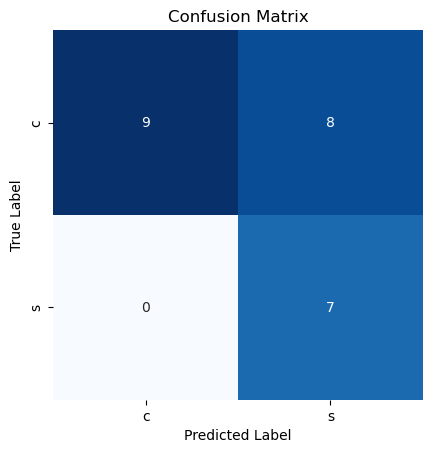

              precision    recall  f1-score   support

           c       0.53      1.00      0.69         9
           s       1.00      0.47      0.64        15

    accuracy                           0.67        24
   macro avg       0.76      0.73      0.66        24
weighted avg       0.82      0.67      0.66        24

False Predicted:


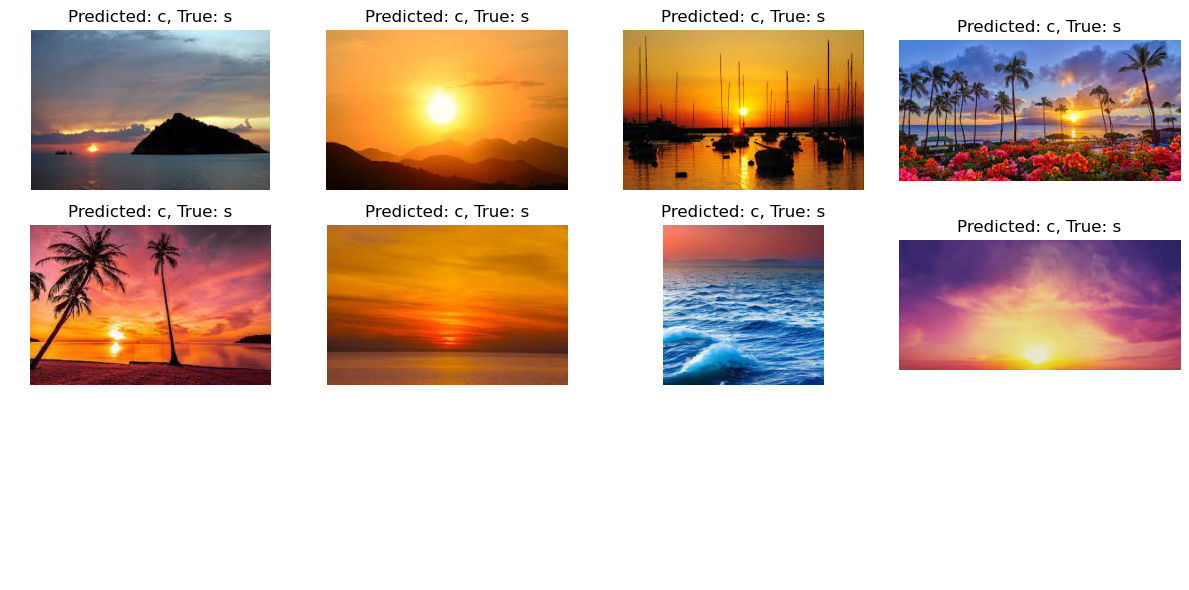

In [7]:
train_and_test(X_test, X_train, y_test, y_train, 'mean')

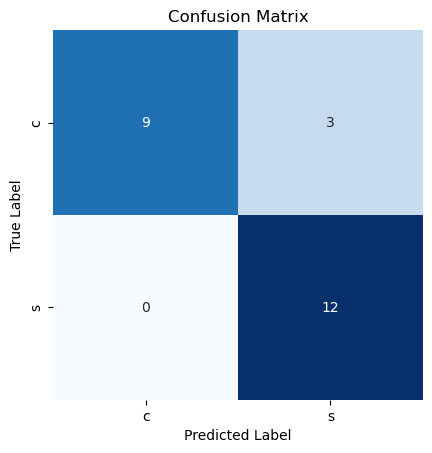

              precision    recall  f1-score   support

           c       0.75      1.00      0.86         9
           s       1.00      0.80      0.89        15

    accuracy                           0.88        24
   macro avg       0.88      0.90      0.87        24
weighted avg       0.91      0.88      0.88        24

False Predicted:


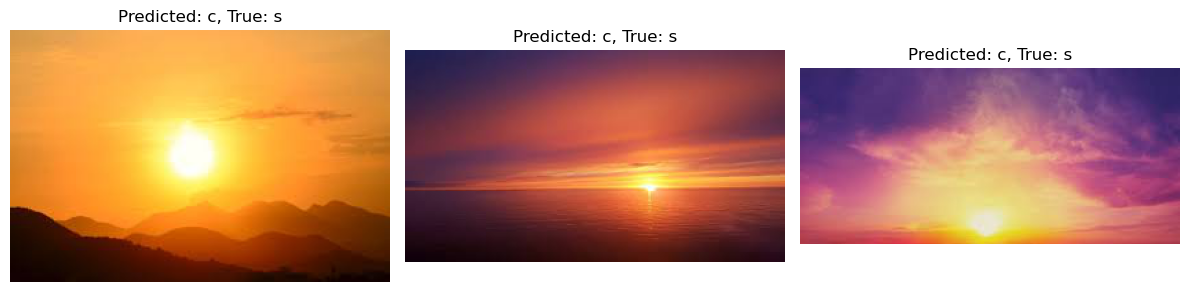

In [8]:
train_and_test(X_test, X_train, y_test, y_train, 'mode')